<a href="https://colab.research.google.com/github/dntlr0611/NLP-Study/blob/main/AutuML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = './drive/MyDrive/dacon/2022/'

import os
os.listdir(path)
import pandas as pd
train = pd.read_csv(path + 'train.csv')
test1 = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')
print(train.shape)
print(test1.shape)
print(submission.shape)

(15000, 70)
(35452, 69)
(35452, 2)


In [ ]:
!pip install pycaret
!pip3 install jinja2==3.0.1
!pip install markupsafe==2.0.1
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 14.2 MB/s 
     |████████████████████████████████| 1.3 MB 67.1 MB/s 
     |████████████████████████████████| 262 kB 70.4 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 167 kB 72.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 6.8 MB 57.6 MB/s 
     |████████████████████████████████| 3.3 MB 56.3 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 17.9 MB 737 kB/s 
     |████████████████████████████████| 1.7 MB 60.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 55.9 MB/s 
     |████████████████████████████████| 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 13.9 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following de

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
clf = setup(data = train,
            target = 'nerdiness',
            train_size = 0.8,
            use_gpu = True,
            ignore_low_variance = True,
            combine_rare_levels = True, 
            rare_level_threshold = 0.1,
            remove_multicollinearity = True,
            multicollinearity_threshold = 0.90,
            normalize = True, session_id = 1000)

,Description,Value
0,session_id,1000
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 70)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,64
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_3 = compare_models(sort = 'AUC' , n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7792,0.8673,0.8373,0.7801,0.8076,0.5494,0.5515,3.611
rf,Random Forest Classifier,0.7794,0.8658,0.8370,0.7806,0.8078,0.5498,0.5517,3.090
lightgbm,Light Gradient Boosting Machine,0.7477,0.8212,0.8092,0.7533,0.7802,0.4849,0.4867,0.484
gbc,Gradient Boosting Classifier,0.7319,0.8022,0.7986,0.7385,0.7673,0.4522,0.4542,7.490
lr,Logistic Regression,0.7279,0.7984,0.7833,0.7403,0.7612,0.4456,0.4467,2.623
lda,Linear Discriminant Analysis,0.7270,0.7965,0.7863,0.7378,0.7612,0.4433,0.4446,1.012
ada,Ada Boost Classifier,0.7228,0.7918,0.7768,0.7369,0.7563,0.4355,0.4365,1.756
knn,K Neighbors Classifier,0.6820,0.7317,0.8310,0.6722,0.7432,0.3377,0.3510,14.253
nb,Naive Bayes,0.6613,0.7108,0.8198,0.6570,0.7282,0.2930,0.3083,0.066
dt,Decision Tree Classifier,0.7103,0.7069,0.7386,0.7382,0.7382,0.4140,0.4142,0.451


In [ ]:
tuned_model = []

In [ ]:
# random_forest
model_rf = create_model('rf', fold = 5)
model_rf = tune_model(model_rf, fold=5, optimize = 'AUC', choose_better = True)
tuned_model.append(model_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7312,0.8059,0.8622,0.7125,0.7802,0.4423,0.4558
1,0.7188,0.7827,0.8540,0.7024,0.7708,0.4157,0.4292
2,0.7125,0.7789,0.8299,0.7039,0.7617,0.4055,0.4143
3,0.7133,0.7765,0.8442,0.6999,0.7653,0.4052,0.4171
4,0.7242,0.7881,0.8600,0.7060,0.7754,0.4268,0.4409
Mean,0.7200,0.7864,0.8501,0.7049,0.7707,0.4191,0.4314
Std,0.0070,0.0105,0.0118,0.0043,0.0067,0.0141,0.0154


In [ ]:
#extra tree
model_et = create_model('et', fold = 5)
model_et = tune_model(model_et, fold=5 , optimize = 'AUC', choose_better = True)
tuned_model.append(model_et)

In [ ]:
#lightGBM
model_lightgbm = create_model('lightgbm', fold = 5)
model_lightgbm = tune_model(model_lightgbm, fold=5, optimize = 'AUC', choose_better = True)
tuned_model.append(model_lightgbm)

In [ ]:
predictions_models = []

In [ ]:
bag_rf_10 = ensemble_model(model_rf, n_estimators = 10, fold=5, optimize = 'AUC')
predictions_models.append(bag_rf_10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7842,0.8604,0.8667,0.7714,0.8163,0.5568,0.5624
1,0.7642,0.8456,0.8450,0.7572,0.7987,0.5161,0.5206
2,0.7575,0.8420,0.8397,0.7515,0.7932,0.5023,0.5068
3,0.7608,0.8409,0.8390,0.7559,0.7953,0.5096,0.5136
4,0.7829,0.8622,0.8608,0.7730,0.8145,0.5547,0.5593
Mean,0.7699,0.8502,0.8502,0.7618,0.8036,0.5279,0.5326
Std,0.0113,0.0092,0.0114,0.0087,0.0098,0.0232,0.0235


In [ ]:
bag_rf_50 = ensemble_model(model_rf, n_estimators = 50, fold = 5, optimize = 'AUC')
predictions_models.append(bag_rf_50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7879,0.8634,0.8682,0.7754,0.8192,0.5647,0.5700
1,0.7662,0.8479,0.8450,0.7598,0.8001,0.5206,0.5248
2,0.7658,0.8440,0.8480,0.7579,0.8004,0.5193,0.5241
3,0.7596,0.8433,0.8367,0.7554,0.7940,0.5072,0.5110
4,0.7892,0.8647,0.8638,0.7794,0.8194,0.5678,0.5721
Mean,0.7738,0.8527,0.8524,0.7656,0.8066,0.5359,0.5404
Std,0.0123,0.0094,0.0118,0.0098,0.0106,0.0252,0.0255


In [ ]:
bst_rf = ensemble_model(model_rf ,method='Boosting', fold = 5, optimize = 'AUC')
predictions_model.append(bst_rf)

In [ ]:
final_model = finalize_model(bag_rf_50)
predictions = predict_model(final_model, data = test1)
predictions

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,Label,Score
0,0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,...,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0,0,0.6164
1,1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,...,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0,1,0.7518
2,2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0,1,0.8034
3,3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,...,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1,0.5812
4,4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,...,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0,1,0.7796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,...,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0,1,0.7292
35448,35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,...,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0,1,0.7364
35449,35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0,1,0.9136
35450,35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,...,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0,0,0.6238


In [ ]:
predictions = predict_model(final_model, data = test1)
predictions

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,Label,Score
0,0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,...,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0,0,0.6164
1,1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,...,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0,1,0.7518
2,2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0,1,0.8034
3,3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,...,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1,0.5812
4,4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,...,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0,1,0.7796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,...,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0,1,0.7292
35448,35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,...,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0,1,0.7364
35449,35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0,1,0.9136
35450,35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,...,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0,0,0.6238


In [ ]:
submission['nerdiness'] = predictions['Score']

In [ ]:
submission.to_csv(path + 'submission_test_bag_rf_3.csv', index = False)

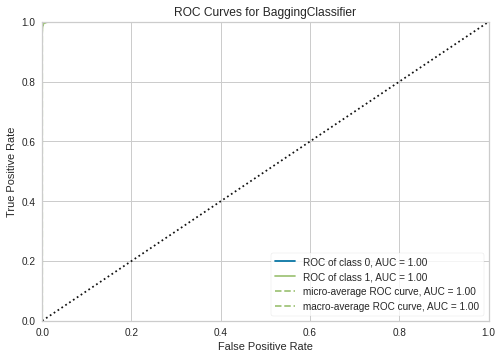

In [ ]:
plot_model(estimator = final_model, plot='auc')


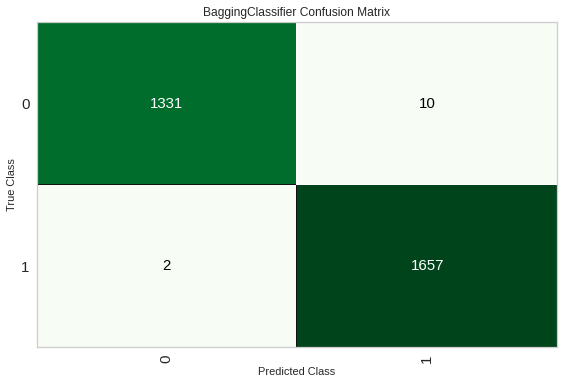

In [ ]:
plot_model(estimator = final_model, plot='confusion_matrix')